In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_excel('rentmortgage.xlsx')

In [3]:
df.head()

,City,Rent ($),Mortgage ($)
0,Atlanta,840,539
1,Chicago,1062,1002
2,Detroit,823,626
3,"Jacksonville, Fla.",779,711
4,Las Vegas,796,655


In [5]:
df.corr()

,Rent ($),Mortgage ($)
Rent ($),1.000000,0.869565
Mortgage ($),0.869565,1.000000


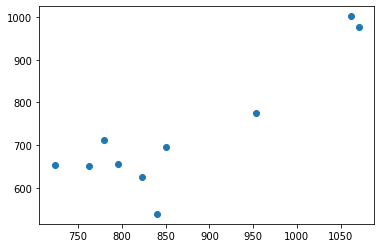

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(x='Rent ($)', y= 'Mortgage ($)', data=df)
plt.show()
plt.clf()

In [34]:
inputs = df['Rent ($)'].array.reshape(-1,1)
targets = df['Mortgage ($)'].array.reshape(-1,1)
# to fix error message:ValueError: Expected 2D array, got 1D array instead:# array=[ 840 1062  823  779  796 1071  953  851  762  723]. Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

In [40]:
model.coef_

array([[1.06992877]])

In [41]:
model.intercept_

array([-197.95831487])

In [42]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [46]:
x_poly = poly_features.fit_transform(inputs)
sm_inputs = sm.add_constant(x_poly)
sm_targets = df['Mortgage ($)']

In [47]:
sm.OLS(sm_targets, sm_inputs).fit().summary()

/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Mortgage ($)   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           0.000333
Time:                        23:07:39   Log-Likelihood:                -52.358
No. Observations:                  10   AIC:                             110.7
Df Residuals:                       7   BIC:                             111.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3965.6331   1335.113      2.970      0.021     808.594    7122.673
x1            -8.2606      2.982     -2.771      0.028     -15.311      -1.210
x2             0.0051      0.002      3.133      0.017       0.001       0.009
==============================================================================
Omnibus:                        5.039   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                1.678
Skew:                          -0.931   Prob(JB):                        0.432
Kurtosis:                       3.750   Cond. No.                     6.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""